In [17]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/face-expression-yolo-data/Face_Expressions_Labels/Face_44.txt
/kaggle/input/face-expression-yolo-data/Face_Expressions_Labels/Face_48.txt
/kaggle/input/face-expression-yolo-data/Face_Expressions_Labels/Face_1.txt
/kaggle/input/face-expression-yolo-data/Face_Expressions_Labels/Face_3.txt
/kaggle/input/face-expression-yolo-data/Face_Expressions_Labels/Face_11.txt
/kaggle/input/face-expression-yolo-data/Face_Expressions_Labels/Face_17.txt
/kaggle/input/face-expression-yolo-data/Face_Expressions_Labels/Face_31.txt
/kaggle/input/face-expression-yolo-data/Face_Expressions_Labels/Face_24.txt
/kaggle/input/face-expression-yolo-data/Face_Expressions_Labels/Face_2.txt
/kaggle/input/face-expression-yolo-data/Face_Expressions_Labels/Face_34.txt
/kaggle/input/face-expression-yolo-data/Face_Expressions_Labels/Face_7.txt
/kaggle/input/face-expression-yolo-data/Face_Expressions_Labels/Face_10.txt
/kaggle/input/face-expression-yolo-data/Face_Expressions_Labels/Face_47.txt
/kaggle/input/fa

In [18]:
!pip install ultralytics

In [19]:
# Import required libraries
import pandas as pd
import numpy as np
import os
import glob
from datetime import datetime
import xml.etree.ElementTree as ET 
import cv2 as cv
import cv2 
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

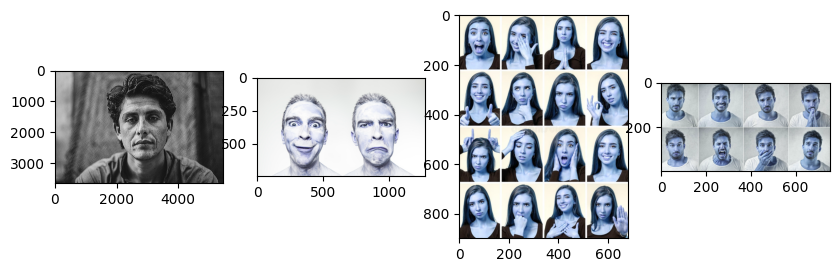

In [20]:
fig,ax = plt.subplots(1,4,figsize=(10,5))
image = cv.imread("/kaggle/input/face-expression-yolo-data/Face_Expressions_Images/Face_10.jpeg")
ax[0].imshow(image)
image = cv.imread("/kaggle/input/face-expression-yolo-data/Face_Expressions_Images/Face_2.jpg")
ax[1].imshow(image)
image = cv.imread("/kaggle/input/face-expression-yolo-data/Face_Expressions_Images/Face_27.jpg")
ax[2].imshow(image)
image = cv.imread("/kaggle/input/face-expression-yolo-data/Face_Expressions_Images/Face_35.jpeg")
ax[3].imshow(image)
fig.show()

In [21]:
annotations_path = "/kaggle/input/face-expression-labels"
images_path = "/kaggle/input/face-expression-yolo-data/Face_Expressions_Images"

In [22]:
dataset = {
            "file":[],
            "name":[],    
            "width":[],
            "height":[],
            "xmin":[],
            "ymin":[],   
            "xmax":[],
            "ymax":[],
           }

for anno in glob.glob(annotations_path+"/*.xml"):
    tree = ET.parse(anno)
    
    for elem in tree.iter():
        if 'size' in elem.tag:
            for attr in list(elem):
                if 'width' in attr.tag: 
                    width = int(round(float(attr.text)))
                if 'height' in attr.tag:
                    height = int(round(float(attr.text)))
                    
        if 'object' in elem.tag:
            for attr in list(elem):
                
                if 'name' in attr.tag:
                    name = attr.text                 
                    dataset['name']+=[name]
                    dataset['width']+=[width]
                    dataset['height']+=[height] 
                    dataset['file']+=[anno.split('/')[-1][0:-4]]
                    
                if 'bndbox' in attr.tag:
                    for dim in list(attr):
                        if 'xmin' in dim.tag:
                            xmin = int(round(float(dim.text)))
                            dataset['xmin']+=[xmin]
                        if 'ymin' in dim.tag:
                            ymin = int(round(float(dim.text)))
                            dataset['ymin']+=[ymin]                                
                        if 'xmax' in dim.tag:
                            xmax = int(round(float(dim.text)))
                            dataset['xmax']+=[xmax]                                
                        if 'ymax' in dim.tag:
                            ymax = int(round(float(dim.text)))
                            dataset['ymax']+=[ymax]

In [26]:
#dataset['file'][0]

In [27]:
df=pd.DataFrame(dataset)
df.head()

,file,name,width,height,xmin,ymin,xmax,ymax


In [28]:
df.name.unique()

array([], dtype=float64)

In [29]:
name_dict = {
    'Happy': 0,
    'Sad': 1,
    'Surprise': 2,
    'Angry':3
}

df['class'] = df['name'].map(name_dict)

In [30]:
df.head()

,file,name,width,height,xmin,ymin,xmax,ymax,class


In [31]:
fileNames = [*os.listdir("/kaggle/input/face-expression-yolo-data/Face_Expressions_Images")]
print('There are {} images in the dataset'.format(len(fileNames)))

There are 50 images in the dataset


In [32]:
fileNames

['Face_6.jpg',
 'Face_17.jpg',
 'Face_37.jpg',
 'Face_20.jpg',
 'Face_5.jpg',
 'Face_19.jpg',
 'Face_14.jpg',
 'Face_32.png',
 'Face_49.jpg',
 'Face_42.jpg',
 'Face_38.jpg',
 'Face_9.jpeg',
 'Face_1.jpg',
 'Face_46.jpg',
 'Face_51.jpg',
 'Face_15.jpg',
 'Face_28.jpg',
 'Face_4.jpg',
 'Face_23.jpg',
 'Face_7.png',
 'Face_30.jpg',
 'Face_29.jpg',
 'Face_18.jpg',
 'Face_10.jpeg',
 'Face_33.jpg',
 'Face_25.jpg',
 'Face_41.jpg',
 'Face_22.jpg',
 'Face_35.jpeg',
 'Face_12.jpg',
 'Face_47.png',
 'Face_40.jpg',
 'Face_11.jpeg',
 'Face_24.jpeg',
 'Face_50.jpg',
 'Face_13.jpg',
 'Face_34.jpg',
 'Face_44.jpeg',
 'Face_36.jpg',
 'Face_45.jpg',
 'Face_48.jpg',
 'Face_27.jpg',
 'Face_2.jpg',
 'Face_31.jpg',
 'Face_16.png',
 'Face_43.jpg',
 'Face_21.jpg',
 'Face_39.jpg',
 'Face_3.jpg',
 'Face_8.jpg']

In [33]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(fileNames, test_size=0.2, random_state=22)
test, val = train_test_split(test, test_size=0.7, random_state=22)
print("Length of Train =",len(train))
print("="*30)
print("Length of Valid =",len(val))
print("="*30)
print("Length of test =", len(test))

Length of Train = 40
Length of Valid = 7
Length of test = 3


In [34]:
# create separate train test and validation dir inside yolo/data/
os.chdir('/kaggle/working/')
os.mkdir('./train')
os.mkdir('./val')
os.mkdir('./test')
os.mkdir('./train/images')
os.mkdir('./train/labels')
os.mkdir('./test/images')
os.mkdir('./test/labels')
os.mkdir('./val/images')
os.mkdir('./val/labels')

In [35]:
input_data = '/kaggle/input/face-expression-yolo-data/Face_Expressions_Images/'
output_data = '/kaggle/working/'

In [36]:
from PIL import Image
def copyImages(imageList, folder_Name):
    for image in imageList:
        print(input_data+image)
        img = Image.open(input_data+image)
        img1 = img.resize((640, 480))
        print(output_data+folder_Name+"/images/"+image)
        _ = img1.save(output_data+folder_Name+"/images/"+image)

copyImages(train, "train")
copyImages(val, "val")
copyImages(test, "test")

/kaggle/input/face-expression-yolo-data/Face_Expressions_Images/Face_13.jpg
/kaggle/working/train/images/Face_13.jpg
/kaggle/input/face-expression-yolo-data/Face_Expressions_Images/Face_27.jpg
/kaggle/working/train/images/Face_27.jpg
/kaggle/input/face-expression-yolo-data/Face_Expressions_Images/Face_28.jpg
/kaggle/working/train/images/Face_28.jpg
/kaggle/input/face-expression-yolo-data/Face_Expressions_Images/Face_8.jpg
/kaggle/working/train/images/Face_8.jpg
/kaggle/input/face-expression-yolo-data/Face_Expressions_Images/Face_46.jpg
/kaggle/working/train/images/Face_46.jpg
/kaggle/input/face-expression-yolo-data/Face_Expressions_Images/Face_10.jpeg
/kaggle/working/train/images/Face_10.jpeg
/kaggle/input/face-expression-yolo-data/Face_Expressions_Images/Face_9.jpeg
/kaggle/working/train/images/Face_9.jpeg
/kaggle/input/face-expression-yolo-data/Face_Expressions_Images/Face_42.jpg
/kaggle/working/train/images/Face_42.jpg
/kaggle/input/face-expression-yolo-data/Face_Expressions_Images/

In [37]:
df['xmax'] = (640/df['width'])*df['xmax']
df['ymax'] = (480/df['height'])*df['ymax']
df['xmin'] = (640/df['width'])*df['xmin']
df['ymin'] = (480/df['height'])*df['ymin']

In [38]:
df[['xmax', 'ymax', 'xmin', 'ymin']] = df[['xmax', 'ymax', 'xmin', 'ymin']].astype('int64')

In [39]:
df['x_center'] = (df['xmax']+df['xmin'])/(2*640)
df['y_center'] = (df['ymax']+df['ymin'])/(2*480)
df['box_height'] = (df['xmax']-df['xmin'])/(640)
df['box_width'] = (df['ymax']-df['ymin'])/(480)

In [40]:
df = df.astype('string')

In [41]:
def create_labels(image_list, data_name):
    fileNames = [x.split(".")[0] for x in image_list]

    for name in fileNames:
        data = df[df.file==name]
        box_list = []

        for index in range(len(data)):
            row = data.iloc[index]
            box_list.append(row['class']+" "+row["x_center"]+" "+row["y_center"]\
                        +" "+row["box_height"]+" "+row["box_width"])

        text = "\n".join(box_list)
        with open(output_data+data_name+"/labels/"+name+".txt", "w") as file:
            file.write(text)


create_labels(train, "train")
create_labels(val, "val")
create_labels(test, "test")

In [42]:
!ls

test  train  val


In [43]:
from ultralytics import YOLO

# load pre-trained model
detection_model = YOLO("yolov8m.pt")

100%|██████████| 49.7M/49.7M [00:00<00:00, 214MB/s] 


In [44]:
text = """
train: /kaggle/working/train
test: /kaggle/working/test
val: /kaggle/working/val

# number of classes
nc: 4

# class names
names: ['Happy', 'Surprise', 'Sad', 'Angry']
"""
with open("data.yaml", 'w') as file:
    file.write(text)

In [45]:
!ls

data.yaml  test  train	val  yolov8m.pt


In [46]:
model = YOLO("yolov8m.pt")

In [ ]:
model.train(data='data.yaml', epochs=5)

In [ ]:
%matplotlib inline
model_path = 'runs/detect/train/'

def plot(ls, size):
    c=1
    plt.figure(figsize=(15,10))
    for im in ls:
        plt.subplot(size[0],size[1],c)
        im = plt.imread(model_path+im)
        plt.imshow(im)
        c+=1
    plt.show()

plot(['P_curve.png','R_curve.png'], (1,2))
plot(['F1_curve.png','PR_curve.png'], (1,2))
plot(['confusion_matrix.png','labels.jpg'], (1,2))
plot(['results.png'],(1,1))

In [ ]:
images_path = '/kaggle/working/test/images'

In [ ]:
import random
# choose random image from dataset
plt.figure(figsize=(20,20))
imgs = random.sample(os.listdir(images_path), 3)
c=1
for img in imgs:
    print(images_path+'/'+img)
    i=model.predict(source=images_path+'/'+img, conf=0.4, save=True, line_thickness=2)
    c+=1

In [ ]:
imgs_folders = random.sample(os.listdir('/kaggle/working/runs/detect'), 3)
imgs_folders

In [ ]:
os.listdir('/kaggle/working/runs/detect/')

In [ ]:
path = '/kaggle/working/runs/detect/train6/'
imgs = os.listdir(path)
plt.figure(figsize=(20,20))
c=1
for img in imgs:
    print(path+img)
    im = plt.imread(path+img)
    plt.subplot(2,3,c)
    plt.axis('off')
    plt.imshow(im)
    c+=1